In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math


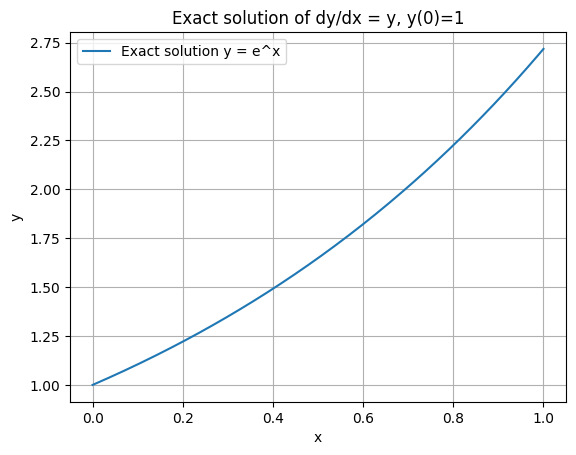

In [30]:
# ODE: dy/dx = y,  y(0) = 1,  x in [0, 1]
# exact solution: y(x) = e^x

def y_exact(x):
    return np.exp(x)

# plot the exact solution on [0, 1]
x_fine = np.linspace(0.0, 1.0, 200)
y_fine = y_exact(x_fine)

plt.figure()
plt.plot(x_fine, y_fine, label="Exact solution y = e^x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact solution of dy/dx = y, y(0)=1")
plt.grid(True)
plt.legend()
plt.show()


In [31]:
def forward_euler(h):
    """
    Solve dy/dx = y, y(0)=1 on [0,1] using forward Euler with step size h.
    Uses vectorized formula: y_n = (1+h)^n * y_0
    Returns arrays x, y_num corresponding to the grid points.
    """
    N = int(1.0 / h)          # number of steps
    x = np.linspace(0.0, 1.0, N + 1)  # grid: x_n = n*h
    
    # Vectorized computation: y_n = (1+h)^n * y_0
    n = np.arange(N + 1)
    y = (1 + h)**n  # y_0 = 1.0, so y_n = (1+h)^n

    return x, y


In [32]:
n_max = 25
def generate_h_values(n_min=1, n_max=25):
    """
    Generate mesh sizes h = 1/2^n for n from n_min to n_max.
    
    Parameters:
    -----------
    n_min : int
        Minimum exponent (default: 1)
    n_max : int
        Maximum exponent (default: 40)
    
    Returns:
    --------
    numpy array : Array of h values [1/2, 1/4, 1/8, ..., 1/2^n_max]
    """
    return np.array([1 / (2**n) for n in range(n_min, n_max + 1)])

n_values = np.arange(1, n_max +1 )  # n values from 1 to 35
h_values = generate_h_values(1, n_max)

print("n values:", n_values)
print("Generated h values:", h_values)

h_min = h_values[-1]  # Smallest h value
N_max = int(1.0 / h_min)  # Maximum number of steps
print(f"\nMaximum N (for h_min = {h_min:.2e}): {N_max:,}")
print(len(n_values))
print(len(h_values))

n values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Generated h values: [5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08]

Maximum N (for h_min = 2.98e-08): 33,554,432
25
25


In [33]:
# Compute solutions and save each to individual file
import os
if not os.path.exists('solutions'):
    os.makedirs('solutions')

with open('forward_euler_solutions.txt', 'w') as f:
    f.write("Forward Euler Solutions\n")
    f.write("="*80 + "\n")
    f.write(f"{'h':>15}  {'N (steps)':>10}  {'x at 0.5':>15}  {'y at 0.5':>20}\n")
    f.write("-"*80 + "\n")
    
    for i, h in enumerate(h_values, 1):
        x_h, y_h = forward_euler(h)
        
        # Save this solution to individual file
        sol_filename = f'solutions/solution_h_{h:.10e}.npz'
        np.savez_compressed(sol_filename, x=x_h, y=y_h, h=h)
        
        print(f"Completed h={h:.2e} ({i}/{len(h_values)})")

Completed h=5.00e-01 (1/25)
Completed h=2.50e-01 (2/25)
Completed h=1.25e-01 (3/25)
Completed h=6.25e-02 (4/25)
Completed h=3.12e-02 (5/25)
Completed h=1.56e-02 (6/25)
Completed h=7.81e-03 (7/25)
Completed h=3.91e-03 (8/25)
Completed h=1.95e-03 (9/25)
Completed h=9.77e-04 (10/25)
Completed h=4.88e-04 (11/25)
Completed h=2.44e-04 (12/25)
Completed h=1.22e-04 (13/25)
Completed h=6.10e-05 (14/25)
Completed h=3.05e-05 (15/25)
Completed h=1.53e-05 (16/25)
Completed h=7.63e-06 (17/25)
Completed h=7.63e-06 (17/25)
Completed h=3.81e-06 (18/25)
Completed h=3.81e-06 (18/25)
Completed h=1.91e-06 (19/25)
Completed h=1.91e-06 (19/25)
Completed h=9.54e-07 (20/25)
Completed h=9.54e-07 (20/25)
Completed h=4.77e-07 (21/25)
Completed h=4.77e-07 (21/25)
Completed h=2.38e-07 (22/25)
Completed h=2.38e-07 (22/25)
Completed h=1.19e-07 (23/25)
Completed h=1.19e-07 (23/25)
Completed h=5.96e-08 (24/25)
Completed h=5.96e-08 (24/25)
Completed h=2.98e-08 (25/25)
Completed h=2.98e-08 (25/25)


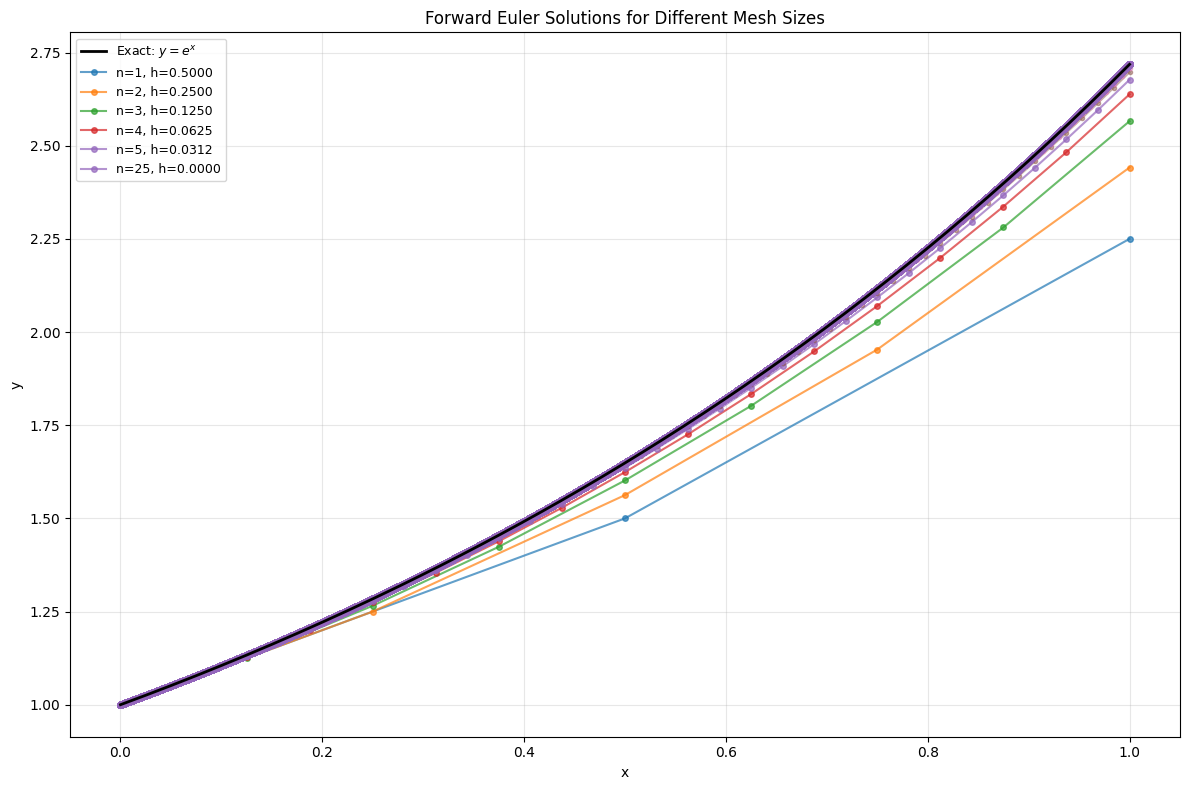

In [34]:
# Load and plot all solutions together
plt.figure(figsize=(12, 8))

# Plot exact solution
x_fine = np.linspace(0.0, 1.0, 200)
y_fine = y_exact(x_fine)
plt.plot(x_fine, y_fine, 'k-', linewidth=2, label='Exact: $y=e^x$', zorder=100)

# Load and plot each numerical solution
for i, (n, h) in enumerate(zip(n_values, h_values)):
    sol_filename = f'solutions/solution_h_{h:.10e}.npz'
    sol_data = np.load(sol_filename)
    x_h, y_h = sol_data['x'], sol_data['y']
    
    # Plot with label showing n value
    if i < 5 or i == len(h_values) - 1:  # Show first 5 and last
        plt.plot(x_h, y_h, 'o-', alpha=0.7, markersize=4, label=f'n={n}, h={h:.4f}')
    else:
        plt.plot(x_h, y_h, 'o-', alpha=0.5, markersize=3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Forward Euler Solutions for Different Mesh Sizes')
plt.legend(loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


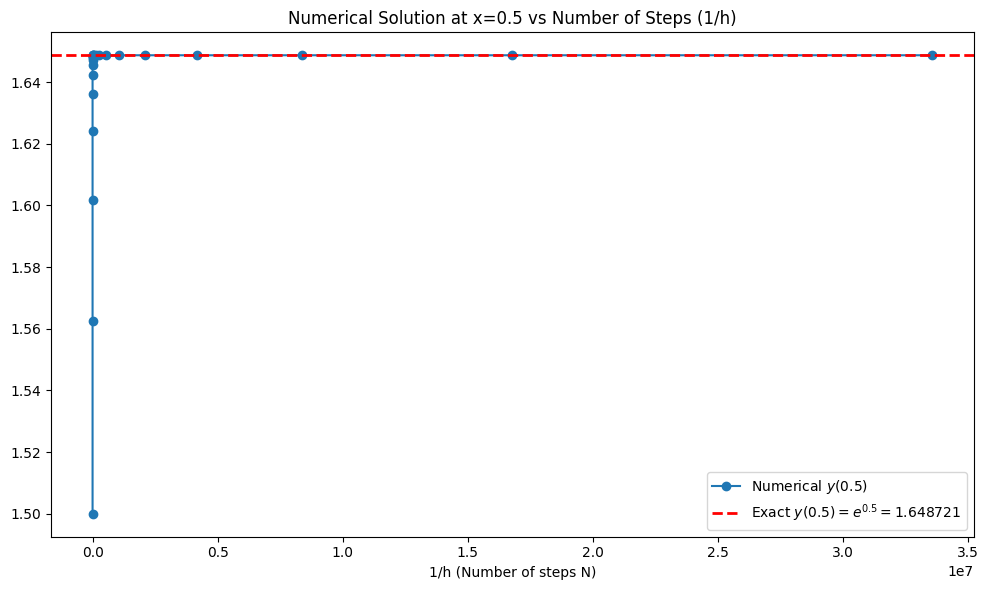

Exact y(0.5) = 1.648721270700128
Numerical y(0.5) values range: [1.500000000000000, 1.648721258416198]


In [36]:
# Calculate values at x=0.5 for all mesh sizes
y_at_05_values = []
exact_at_05 = math.e**0.5

for n, h in zip(n_values, h_values):
    sol_filename = f'solutions/solution_h_{h:.10e}.npz'
    sol_data = np.load(sol_filename)
    x_h, y_h = sol_data['x'], sol_data['y']
    
    # Find value at x=0.5
    idx_05 = np.argmin(np.abs(x_h - 0.5))
    y_at_05_values.append(y_h[idx_05])

y_at_05_values = np.array(y_at_05_values)

# Calculate 1/h values (number of steps N)
N_values = 1.0 / h_values

# Plot y(0.5) vs 1/h
plt.figure(figsize=(10, 6))
plt.plot(N_values, y_at_05_values, 'o-', label='Numerical $y(0.5)$', markersize=6)
plt.axhline(y=exact_at_05, color='r', linestyle='--', linewidth=2, label=f'Exact $y(0.5) = e^{{0.5}} = {exact_at_05:.6f}$')

plt.xlabel('1/h (Number of steps N)')
plt.title('Numerical Solution at x=0.5 vs Number of Steps (1/h)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Exact y(0.5) = {exact_at_05:.15f}")
print(f"Numerical y(0.5) values range: [{y_at_05_values.min():.15f}, {y_at_05_values.max():.15f}]")


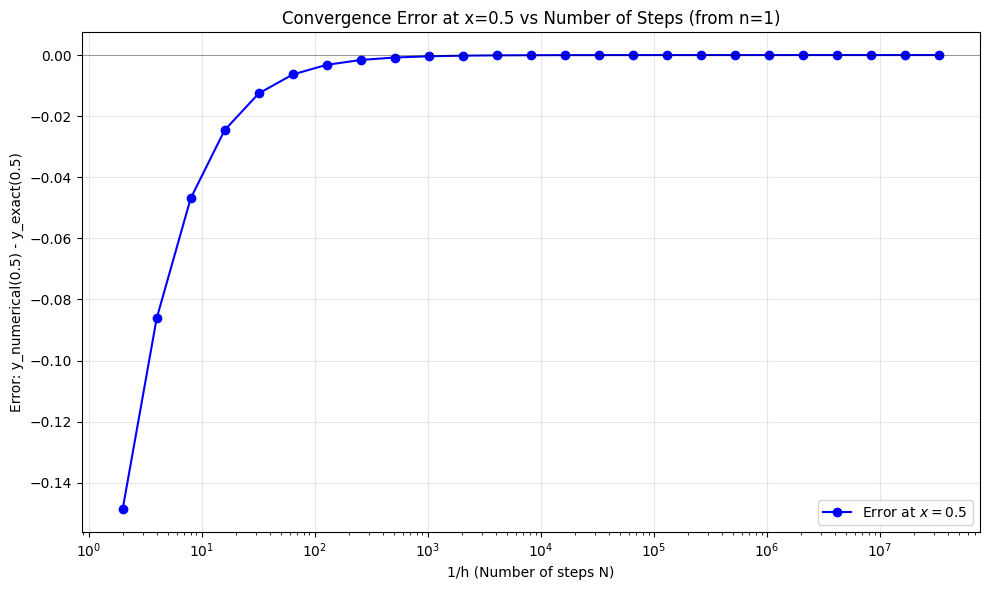

Error range: [-1.49e-01, -1.23e-08]

First 5 errors:
  N=       2, h=0.500000, Error=-1.487213e-01
  N=       4, h=0.250000, Error=-8.622127e-02
  N=       8, h=0.125000, Error=-4.691463e-02
  N=      16, h=0.062500, Error=-2.455118e-02
  N=      32, h=0.031250, Error=-1.257026e-02


In [42]:
# Calculate errors at x=0.5 for all mesh sizes
errors_at_05 = (y_at_05_values - exact_at_05)

# Plot error vs 1/h (using semilogx for signed errors) - skip first 11 entries
skip_n = 0
plt.figure(figsize=(10, 6))
plt.semilogx(N_values[skip_n:], errors_at_05[skip_n:], 'o-', label='Error at $x=0.5$', markersize=6, color='blue')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.5)

plt.xlabel('1/h (Number of steps N)')
plt.ylabel('Error: y_numerical(0.5) - y_exact(0.5)')
plt.title(f'Convergence Error at x=0.5 vs Number of Steps (from n={skip_n+1})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print error statistics
print(f"Error range: [{errors_at_05.min():.2e}, {errors_at_05.max():.2e}]")
print(f"\nFirst 5 errors:")
for i in range(min(5, len(errors_at_05))):
    print(f"  N={N_values[i]:8.0f}, h={h_values[i]:.6f}, Error={errors_at_05[i]:.6e}")
